<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M2/notebooks/M2_Networks_hands_on_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Network Analysis - Application (Python)
### Roman Jurowetzki
Updated 4/10 - 2020

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Network data structures
* Below an example of a minimal edge list created by zipping together two lists into a list of tuples.

* In this case, let us assume this network to be unweighted, meaning a connection can be eiter tresent or absent.


In [ ]:
origin = [1, 2, 2, 1, 4]
target = [2, 3, 4, 5, 1]

In [ ]:
edge_list = list(zip(origin, target))

print(edge_list)

This can of cause also be a DataFrame where columns indicate origin and target

In [ ]:
df = pd.DataFrame({'origin':origin, 'target':target})

In [ ]:
df

The NetowrkX library allows us to do many network-related things in Python. While there are other packages for that, NetworkX remains the most popular choice.

A network can be initiated from a list of tuples (more basic) from numpy arrays or from DataFrames

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from(edge_list)

In [ ]:
G_from_df = nx.from_pandas_edgelist(df, source = 'origin', target = 'target')

In [ ]:
print(G.nodes() == G_from_df.nodes())
print(G.edges() == G_from_df.edges())


#### Adjacency Matrix

* A second popular form of network representation is the **adjacency-matrix** (also called **socio-matrix**).
* It is represented as a $n*n$ matrix, where $n$ stands for the number of elements of which their relationships should be represented.
* The value in the cell that intercepts row $n$ and column $m$ indicates if an edge is present (=1) or absent (=0).
* Tip: Given an edgelist, an adjacency matrix can easily be produced by crosstabulating:



In [ ]:
df_cros = pd.crosstab(df.origin, df.target)

In [ ]:
df_cros

In [ ]:
idx = df_cros.columns.union(df_cros.index)
df_adj_asy = df_cros.reindex(index = idx, columns=idx, fill_value=0)

In [ ]:
df_adj_asy

In [ ]:
nx.to_pandas_adjacency(G)

In [ ]:
df_adj_asy + df_adj_asy.T

In [ ]:
from scipy import sparse

In [ ]:
sparse_df = sparse.csr_matrix(df_adj_asy)

In [ ]:
print(sparse_df)

In [ ]:
edge_list

## Nodelists
* Edgelists as well as adjacency matrices only stores connectivity pattern between nodes, but due to their structure cannot store informations on the nodes in which we might be interested.
* Therefore, we in many cases also provide a a **node list** with these informations (such as the names of the nodes or any kind of groupings).


In [ ]:
name = ["Jesper", "Pernille", "Jacob", "Dorte", "Donald"]
sex = ["M", "F", "M", "F", "M"]
group = ["A", "B", "B", "A", "C"]

node_list = pd.DataFrame({'name':name, 'sex':sex, 'group':group})

In [ ]:
node_list

#### NetworkX Graphs

We have already seen a sneak-preview of NetworkX functionality

There are many weays to create various types of Graph objects in NetworkX and I'd advise you to have a look at the [documentation](https://networkx.github.io/documentation/stabl)

Let's combine the data from above and create a graph. While it is easy to create a graph from an edgelist it cannot be inferred from a nodelist directly.


In [ ]:
dict(enumerate(name))

In [ ]:
mapper = dict(enumerate(name, 1))

print(mapper)

In [ ]:
print([mapper[x] for x in origin])

origin = [mapper[x] for x in origin]
target = [mapper[x] for x in target]

In [ ]:
edge_list = list(zip(origin, target))

print(edge_list)

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from(edge_list)

In [ ]:
node_attr = node_list.set_index('name').to_dict('index')

In [ ]:
node_attr

In [ ]:
nx.set_node_attributes(G, node_attr)

In [ ]:
G.nodes(data=True)

In [ ]:
G.edges()

In [ ]:
len(G.nodes())

In [ ]:
# Not pretty at all
plt.figure(figsize=(5,5)) 
nx.draw_kamada_kawai(G, with_labels = True)

In [ ]:
G['Jacob']

In [ ]:
G['Jesper']

In [ ]:
G.nodes()['Jesper']

In [ ]:
[node for node, data in G.nodes(data=True) if data['sex'] == 'F']

In [ ]:
node_list[node_list.sex == 'F'].name

In [ ]:
G_sub = nx.subgraph(G, node_list[node_list.sex == 'F'].name)

In [ ]:
pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

## Network analysis and measures

In [168]:
# Generate sample small world network
g = nx.watts_strogatz_graph(200, 3 , 5)

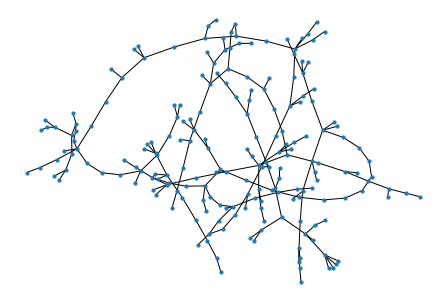

In [169]:
# Quick visualization
nx.draw(g, with_labels = False, node_size=10)

#### Node level measures

Centralities can be easily created on node level [various centrality algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).



In [171]:
centrality_dgr = nx.degree_centrality(g)
centrality_eigen = nx.eigenvector_centrality_numpy(g)
centrality_between = nx.betweenness_centrality(g)

In [173]:
nd_attrb_df = pd.DataFrame({'centrality_dgr':centrality_dgr,
                           'centrality_eigen':centrality_eigen,
                           'centrality_between':centrality_between})

In [174]:
nd_attrb = nd_attrb_df.to_dict('index')

In [175]:
nx.set_node_attributes(g, nd_attrb)

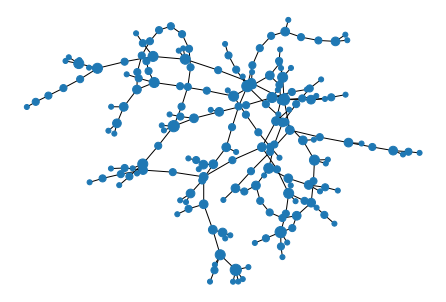

In [176]:
# Degree centrality
nx.draw(g, with_labels = False, node_size=[v * 5000 for v in centrality_dgr.values()])

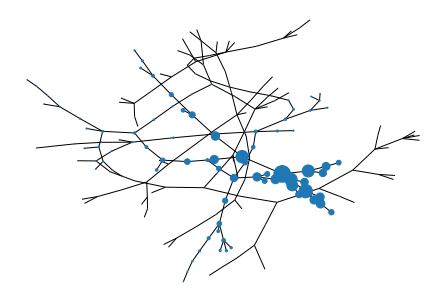

In [177]:
# Eigenvalue centrality
nx.draw(g, with_labels = False, node_size=[v * 500 for v in centrality_eigen.values()])

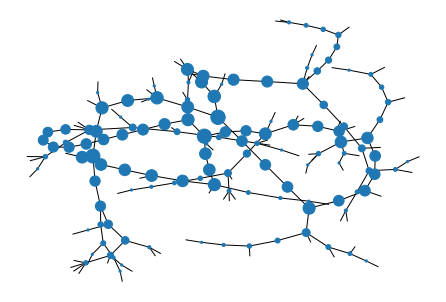

In [178]:
# Betweenness centrality
nx.draw(g, with_labels = False, node_size=[v * 500 for v in centrality_between.values()])

### Clustering (Community detection)

* Clustering algorithms are similar to UML algorithms in traditional ML - there are many diffrent approaches and the data structure is often the determinant of what is makes sense and should be used.

* While there are several community detection algorithms in the NetworkX library, one of the most known and used - the Louvain algorithm is maintained as an own package (http://python-louvain.readthedocs.io/)

* It is used in a very similar fashion to other functions in NetworkX and returns similar objects.



In [179]:
G = nx.random_partition_graph(np.random.randint(15,18,5), 0.75, 0.05)

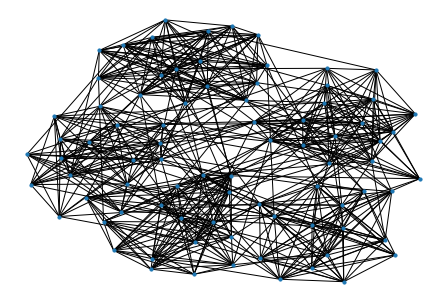

In [180]:
nx.draw_kamada_kawai(G, node_size=10)

In [181]:
import community as community_louvain

In [183]:
partition = community_louvain.best_partition(G)

In [184]:
nx.set_node_attributes(G, partition, 'partition')

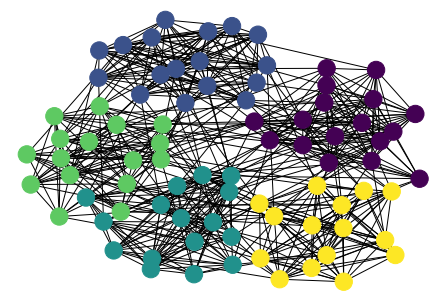

In [185]:
nx.draw_kamada_kawai(G, node_color=list(partition.values()))


#### Neighborhood of a Node

* Lets check the size of all nodes neighborhood at distance 2.



In [186]:
g1 = nx.ego_graph(G, 1, radius=2)
g50 = nx.ego_graph(G, 50, radius=2)

In [187]:
g1_df = pd.DataFrame.from_dict(dict(g1.nodes(data=True)), orient='index')
g50_df = pd.DataFrame.from_dict(dict(g50.nodes(data=True)), orient='index')

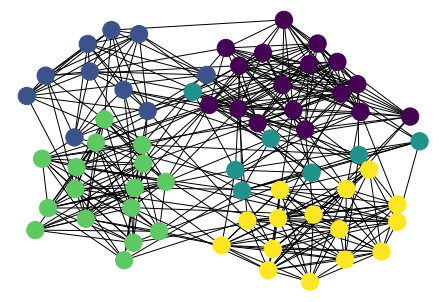

In [188]:
nx.draw_kamada_kawai(g1, node_color=g1_df.partition)

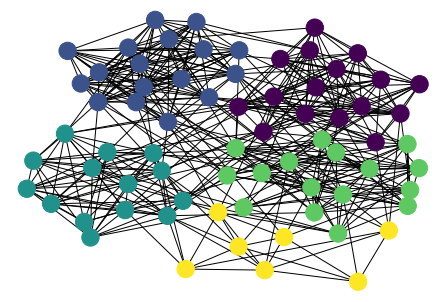

In [189]:
nx.draw_kamada_kawai(g50, node_color=g50_df.partition)


## (Global) Network structure

* Finally, it is often also informative to look at the overal characteristics of the network. We will do this in more detail next time, but just so you know:

* The **density** of a measure represents the share of all connected to all possible connections in the network



In [190]:
nx.density(G)

0.1845679012345679


**Transistivity**, also called the **Clustering Cefficient** indicates how much the network tends to be locally clustered.
* That is measured by the share of **closed triplets**. Again, we will dig into that next time.



In [191]:
nx.transitivity(G)

0.4945600756859035


* The **diameter** is the longest of the shortest paths between two nodes of the network.



In [192]:
nx.diameter(G)

3


* Finally, the **mean distance**, or **average path lenght** represents the mean of all shortest paths between all nodes. It is a measure of diffusion potential within a network.



In [193]:
nx.average_shortest_path_length(G)

2.0373456790123456